In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Transaction_ID,Product_Category,Price,Quantity,Customer_rating,Discount_Code,Total_Sale_Amount,Weighted_Rating,Price_Tier
0,101,Electronics,150.99,1.0,4.50,YES,150.99,4.50,High_Price
1,102,Books,25.00,2.0,3.00,NO,50.00,6.00,Mid_Price
2,103,Groceries,5.50,5.0,5.00,NO,27.50,25.00,Low_Price
3,104,Books,40.00,1.0,4.25,YES,40.00,4.25,Mid_Price
4,105,Electronics,180.50,1.0,4.00,NO,180.50,4.00,High_Price


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     9 non-null      int64  
 1   Product_Category   9 non-null      object 
 2   Price              9 non-null      float64
 3   Quantity           9 non-null      float64
 4   Customer_rating    9 non-null      float64
 5   Discount_Code      9 non-null      object 
 6   Total_Sale_Amount  9 non-null      float64
 7   Weighted_Rating    9 non-null      float64
 8   Price_Tier         9 non-null      object 
dtypes: float64(5), int64(1), object(3)
memory usage: 780.0+ bytes


In [4]:
data_mental=pd.read_csv('Mental_Health.csv')
data_mental.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [5]:
data_mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


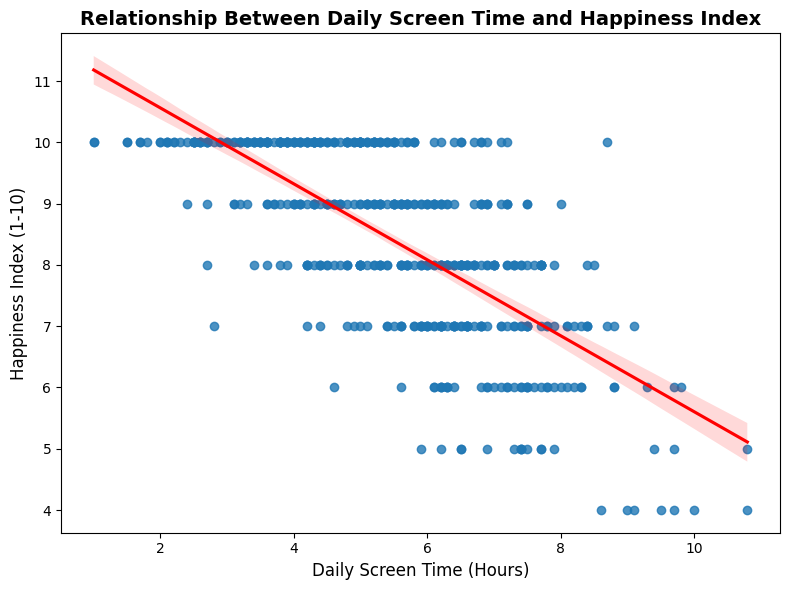

In [8]:
#Plot 1: Daily Screen Time vs. Happiness Index (Mental Health)
plt.figure(figsize=(8, 6))
sns.regplot(data_mental, x='Daily_Screen_Time(hrs)',y='Happiness_Index(1-10)',line_kws={'color':'red'})
plt.title('Relationship Between Daily Screen Time and Happiness Index', fontsize=14, fontweight='bold')
plt.xlabel('Daily Screen Time (Hours)', fontsize=12)
plt.ylabel('Happiness Index (1-10)', fontsize=12)
plt.tight_layout()
plt.show()

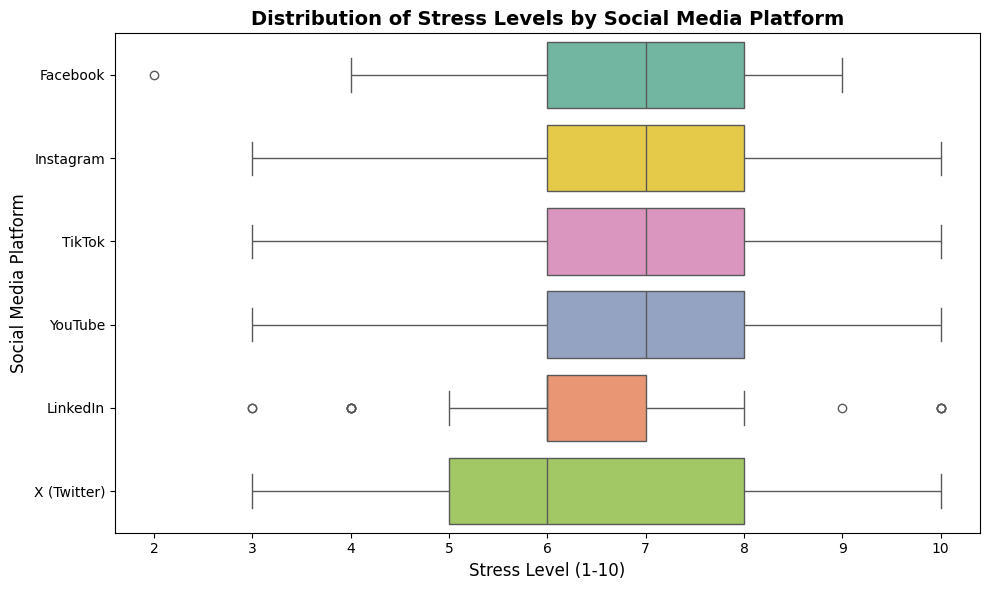

In [19]:
# Plot 2: Stress Level by Social Media Platform (Mental Health)
#Calculate median stress level to order the platforms
median_stress = data_mental.groupby('Social_Media_Platform')['Stress_Level(1-10)'].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.boxplot(data_mental, x='Stress_Level(1-10)',y='Social_Media_Platform',hue='Social_Media_Platform',order=median_stress,palette='Set2')
plt.title('Distribution of Stress Levels by Social Media Platform', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level (1-10)', fontsize=12)
plt.ylabel('Social Media Platform', fontsize=12)
plt.tight_layout()
plt.show()

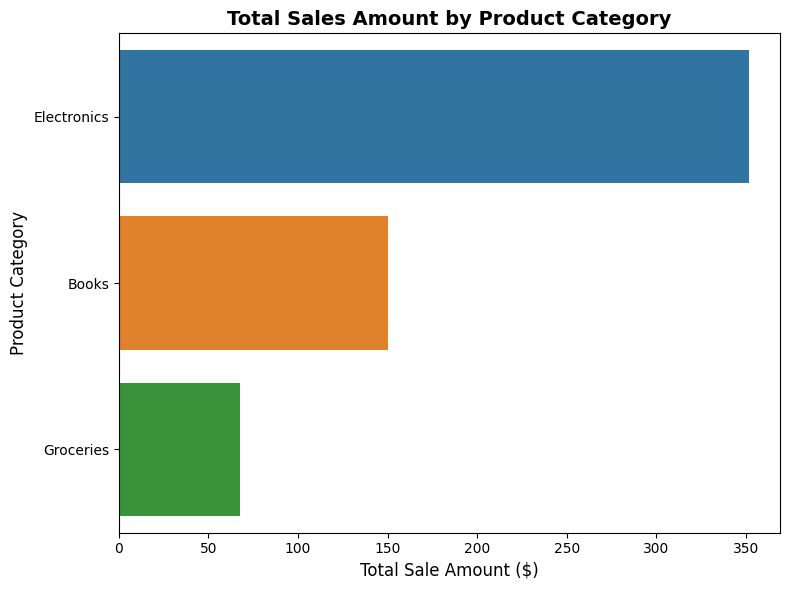

In [ ]:
#Plot 3: Total Sale Amount by Product Category (Sales Data)
#Calculate total sales by product category
sales_by_category = data.groupby('Product_Category')['Total_Sale_Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(sales_by_category, x='Total_Sale_Amount', y='Product_Category',hue='Product_Category')
plt.title('Total Sales Amount by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Total Sale Amount ($)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

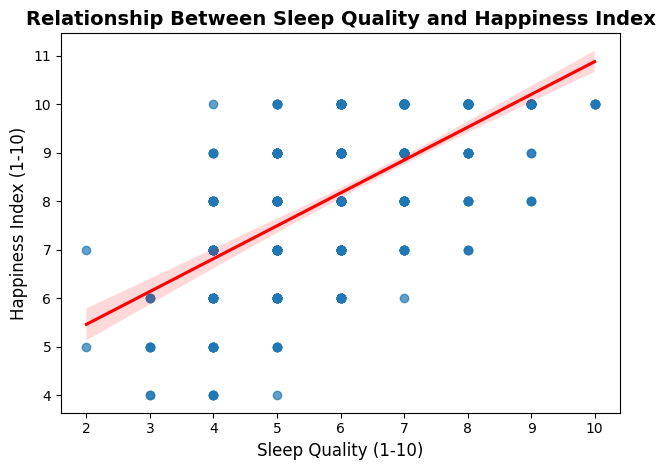

In [ ]:
# Plot 4: Scatter plot of Sleep Quality vs Happiness Index
plt.figure(figsize=(8, 6))
sns.regplot(data_mental, x='Sleep_Quality(1-10)', y='Happiness_Index(1-10)', scatter_kws={'alpha': 0.7}, line_kws={'color':'red'})
plt.title('Relationship Between Sleep Quality and Happiness Index', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Quality (1-10)', fontsize=12)
plt.ylabel('Happiness Index (1-10)', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
Mini-Report: Data Visualization Insights
Section 1: Mental Health and Social Media Usage
This section explores the relationship between daily habits, social media usage, and mental well-being using the Mental Health dataset.

Plot 1: Relationship Between Daily Screen Time and Happiness Index
This scatter plot shows a slightly negative correlation between the amount of time spent on screens and the self-reported happiness index.

Insight: As daily screen time increases, the average happiness index tends to decrease. This suggests that excessive screen time might be a contributing factor to lower perceived happiness.

Plot 2: Distribution of Stress Levels by Social Media Platform
This box plot compares the distribution of stress levels across the most commonly used social media platforms. The platforms are ordered by their median stress level.

Insight: Users of platforms like X (Twitter) and LinkedIn report the highest median stress levels, while users of YouTube and TikTok report the lowest. This suggests that the type of content and platform environment may influence stress.

Visualization Details: The box plots use the 'Set2' pastel color palette, and the platforms are ordered by median stress (from highest to lowest).

Plot 3: Relationship Between Sleep Quality and Happiness Index
This scatter plot examines the connection between sleep quality and the happiness index, suggesting a much stronger correlation than screen time.

Insight: There is a clear positive trend: individuals who report higher sleep quality also tend to report a higher happiness index. This reinforces the importance of good sleep for mental well-being.

In [ ]:
Section 2: Sales Performance
This section provides an overview of sales performance by product category using the Sales Data dataset.

Plot 4: Total Sale Amount by Product Category
This bar chart shows the total sales generated by each product category.

Insight: Electronics is the leading product category in terms of total sales, followed by Books. Groceries contribute the least to the total sale amount in this small sample.

Visualization Details: Bars are sorted by total sales amount (highest to lowest).